## Lab 4 Report

Simon Chen & Shih-Ming Lin & Cynthia Li

In [33]:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
import simpleaudio as sa

## Summary
This lab aims falimiarize with using convolution to quantitatively measure the similarity between signals and decipher recevied signal. It also includes introduction to loops in python.

## Assignment 1: Matched Filter with Ideal Signals

<IPython.core.display.Javascript object>


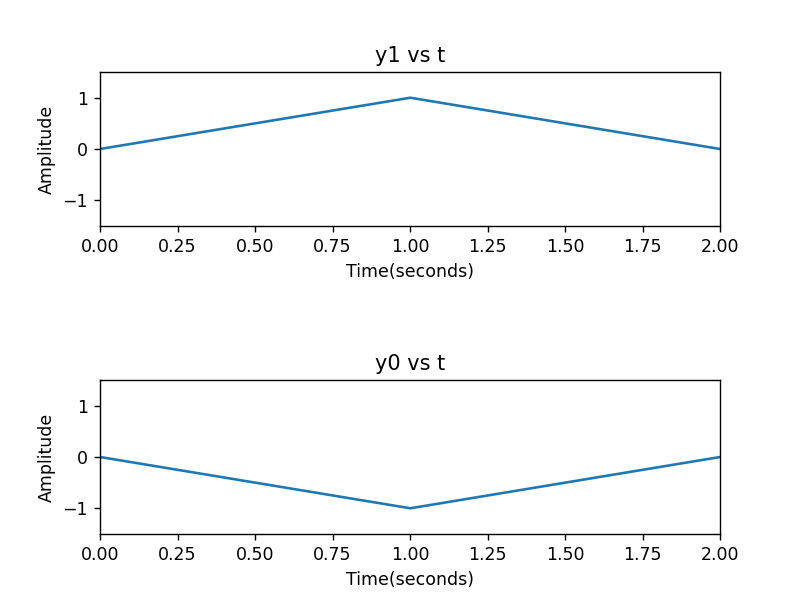

[0.999875]
[-0.999875]


In [34]:
# Assignment 1: Matched Filter with Ideal Signals

# Part 1
fs = 8000
t = np.arange(0, fs+1,1)*1/fs

def u(t):
    return 1.0*(t>0)

s1 = u(t)- u(t-1)
s0 = -s1

# Part 2
y1 = np.convolve(s1,s1)/fs
y0 = np.convolve(s1,s0)/fs

# Part 3
t_y = np.arange(0,len(y1),1)*1/fs

fig1 = plt.figure(1)
fig1.subplots_adjust(hspace = 1, wspace = 0.5)

plt.subplot(2,1,1)
plt.plot(t_y, y1)
plt.title('y1 vs t')
plt.xlabel('Time(seconds)')
plt.ylabel('Amplitude')
plt.xlim(0,2)
plt.ylim(-1.5,1.5)

plt.subplot(2,1,2)
plt.plot(t_y, y0)
plt.title('y0 vs t')
plt.xlabel('Time(seconds)')
plt.ylabel('Amplitude')
plt.xlim(0,2)
plt.ylim(-1.5,1.5)

# Part 4
y1_corr = y1[t_y == 1]
print(y1_corr)
y2_corr = y0[t_y == 1]
print(y2_corr)

###  Discussion
Due to the commutative property of convolution, the order does not matter. So s0(t) * s1(t) should be the same as s1(t) * s0(t).

## Assignment 2: Signal Decoding with a Matched Filter

In [35]:
# Assignment 2: Signal Decoding with a Matched Filter

# Part A
def decode (r, fs, s0, s1):
    s = 0
    y0 = np.convolve(r,s0)/fs
    y1 = np.convolve(r,s1)/fs
    t_y0 = np.arange(0,len(y0),1)/fs
    t_y1 = np.arange(0,len(y1),1)/fs
    y0_corr = y0[t_y0 == 1]
    y1_corr = y1[t_y1 == 1]
    if (y1_corr > y0_corr):
        s = 1
    return s

<IPython.core.display.Javascript object>


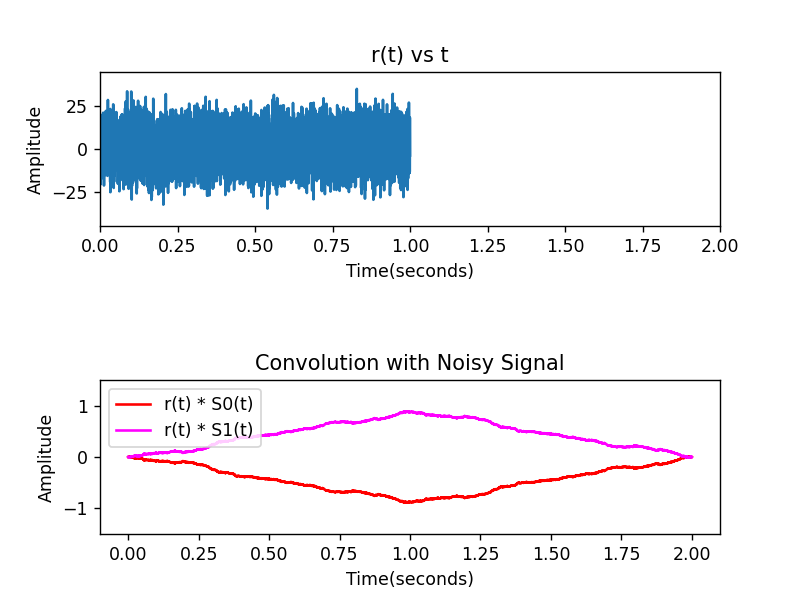

[0.87852303]
[-0.999875]
0
1


In [46]:
# Part B & Part C
n = np.random.normal(0,10,len(s1))
r = s1 + n
t_r = np.arange(0,len(r),1)/fs

yr1 = np.convolve(r,s1)/fs
t_yr1 = np.arange(0,len(yr1),1)/fs
yr0 = np.convolve(r,s0)/fs
t_yr0 = np.arange(0,len(yr0),1)/fs
    
fig2 = plt.figure(2)
fig2.subplots_adjust(hspace = 1, wspace = 0.5)

plt.subplot(2,1,1)
plt.plot(t_r, r)
plt.title('r(t) vs t')
plt.xlabel('Time(seconds)')
plt.ylabel('Amplitude')
plt.xlim(0,2)
plt.ylim(-45,45)

plt.subplot(2,1,2)
plt.plot(t_yr0, yr0, label = 'r(t) * S0(t)', color = 'red')
plt.plot(t_yr1, yr1, label = 'r(t) * S1(t)', color = 'magenta')
plt.title('Convolution with Noisy Signal')
plt.xlabel('Time(seconds)')
plt.ylabel('Amplitude')
plt.xlim(-0.1,2.1)
plt.ylim(-1.5,1.5)
plt.legend(loc='upper left')

yr1_corr = yr1[t_yr1 == 1]
print(yr1_corr)
yr0_corr = y0[t_yr0 == 1]
print(yr0_corr)

# Part D

# test 1
r=s0+n
s = decode (r, fs, s0, s1)
print(s)

# test 2
r=s1+n
s = decode (r, fs, s0, s1)
print(s)    

###  Discussion
The correlation measurement between s1(t) and s0(t) = v(t) - v(t-0.5)= u(t)-2*u(t-0.5)+u(t-1) is less than the correlation measurement between s1(t) and s0(t) = -s1(t). So s0(t) = -s1(t) = -u(t)+u(t-0.5) would be more useful for communications as it provides the possibility to decode more potential noises.

## Assignment 3: Decipher Received Message

In [108]:
# Assignment 3: Decipher Received Message

# Part A
file = open('receivedmsg.csv','rb')
rm = np.loadtxt(file, delimiter = ',')

# Part B
rm_rows = len(rm) 
message_bits = np.zeros(rm_rows)

# Part C
message_bits = []
for i in range(rm_rows):
    s = decode(rm[i],fs,s0,s1)
    message_bits.append(s)

# Part D   
for i in range(rm_rows):
    print(message_bits[i], end='')

0100011101101111001000000100100001110101011100110110101101101001011001010111001100100001

### Discussion
Go Huskies!